In [1]:
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML

c:\Users\1mith\.conda\envs\fake\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
nltk.download('stopwords')
stopwords_list = stopwords.words('english') + list(string.punctuation)

# It is generally a good idea to also remove punctuation
# Now we have a list that includes all english stopwords, as well as all punctuation
stopwords_list += ["''", '""', '...', '``','”', "`","*", "’", "“", "‘", "–", "⋆", "'s", "—", "well"]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\1mith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_csv("../data/combined_text.csv")

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['combined_text'] ,data['target'], test_size=0.20, random_state = 777)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
import category_encoders as ce

from time import time
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [6]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
('vect', CountVectorizer(stop_words = stopwords_list)),
('tfidf', TfidfTransformer()),
('clf', LogisticRegression()),
])

In [7]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('tfidf', TfidfTransformer()), ('clf', LogisticRegression())])

In [8]:
preds = text_clf.predict(X_test)
score = metrics.accuracy_score(y_test, preds)
score

0.7927646270656543

In [13]:
prf = precision_recall_fscore_support(y_test, preds)
print("precision: ",prf[0])
print("recall; ",prf[1])
print("f1: ",prf[2])
print("Each label: ",prf[3])


precision:  [0.75690999 0.85386473]
recall;  [0.89823381 0.67333333]
f1:  [0.82153846 0.75292865]
Each label:  [1189 1050]


In [12]:
from sklearn.metrics import f1_score
f1_score(y_test, preds)

0.7529286474973377

## Test buzzFeed

In [14]:
data = pd.read_csv("../data/fakenewsnet_kaggle/BuzzFeed_fake_news_content.csv")
data['target'] = 1
data1 = pd.read_csv("../data/fakenewsnet_kaggle/BuzzFeed_real_news_content.csv")
data1['target'] = 0
df_merge = pd.concat([data, data1], sort = 'False')
df_merge['combined'] = df_merge['title'] + df_merge['text']

C:\Users\1mith\AppData\Local\Temp\ipykernel_8388\3977825428.py:5: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  df_merge = pd.concat([data, data1], sort = 'False')


In [16]:
preds = text_clf.predict(df_merge["combined"])
score = metrics.accuracy_score(df_merge['target'], preds)

score

0.8021978021978022

In [17]:
prf = precision_recall_fscore_support(df_merge['target'], preds)
print("precision: ",prf[0])
print("recall; ",prf[1])
print("f1: ",prf[2])
print("Each label: ",prf[3])


precision:  [0.76699029 0.84810127]
recall;  [0.86813187 0.73626374]
f1:  [0.81443299 0.78823529]
Each label:  [91 91]


### Testing wellFake Dataset
##### https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification?resource=download&select=WELFake_Dataset.csv

In [18]:
data = pd.read_csv("../data/WELFake_cleaned.csv") #here 0 - fake, 1 - real
# data['target'] = np.where(data['label']==1, 0, 1)
# data['combined'] = data['title'] + data['text']
# data = data.dropna()
# data.to_csv("../data/WELFake_cleaned.csv",index=False)

# data = data.iloc[0:100]

In [24]:
data.size

59745

In [19]:
td = data.iloc[0:1000]
preds = text_clf.predict(td["combined"])
score = metrics.accuracy_score(td['target'], preds)

score

0.419

In [20]:
prf = precision_recall_fscore_support(td['target'], preds)
print("precision: ",prf[0])
print("recall; ",prf[1])
print("f1: ",prf[2])
print("Each label: ",prf[3])


precision:  [0.46478873 0.25570776]
recall;  [0.69011407 0.11814346]
f1:  [0.55547054 0.16161616]
Each label:  [526 474]


### FakeCovid Dataset Test

In [29]:
data = pd.read_csv("../data/FakeCovid_July2020.csv")
data['target'] = 1
data['combined'] = data['title'] + data['content_text']

data = data[data['combined'].notna()]

In [30]:
data.size

143745

In [31]:
data = data[data['lang'] == 'en'] #only english
preds = text_clf.predict(data["combined"])
score = metrics.accuracy_score(data['target'], preds)

score

0.25413005272407735

In [32]:
data.size

59745

In [23]:
prf = precision_recall_fscore_support(data['target'], preds)
print("precision: ",prf[0])
print("recall; ",prf[1])
print("f1: ",prf[2])
print("Each label: ",prf[3])


precision:  [0. 1.]
recall;  [0.         0.25413005]
f1:  [0.         0.40526906]
Each label:  [   0 2845]


c:\Users\1mith\.conda\envs\fake\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Social Context

In [151]:
def word_importance(model, sentence):
    '''
    model: trained model instances, which can support model.predict_prob
    sentence: input sentence/article
    '''
    prob_score = {} #stores probability score for each prediction
    prob_score['Total_sentence'] = model.predict_proba([sentence]).reshape(-1)
    filtered_words = get_filtered_words(sentence) #get candidate for word importance
    for word in filtered_words:
        new_sentence = sentence.replace(word,'')
        new_probs = model.predict_proba([new_sentence]).reshape(-1) #getting prediction probability with word
        prob_score[word] = new_probs
    same_class_pos_impact = {}
    same_class_neg_impact = {}
    diff_class_pos_impact = {}
    diff_class_neg_impact = {}
    for word in prob_score:
        init_class_pred = np.argmax(prob_score['Total_sentence'])
        if word != 'Total_sentence':
            class_pred = np.argmax(prob_score[word]) #index
            prob_score[word] = prob_score['Total_sentence'] - prob_score[word]
            perc_change = abs(prob_score[word][class_pred]) * 100
            if (init_class_pred != class_pred):
                #prediction shift...
                if prob_score[word][class_pred] > 0:
                    diff_class_pos_impact[word] = perc_change
                else:
                    diff_class_neg_impact[word] = perc_change
            else:
                # same class prediction...
                if prob_score[word][class_pred] > 0:
                    same_class_pos_impact[word] = perc_change
                else:
                    same_class_neg_impact[word] = perc_change
    return same_class_pos_impact, same_class_neg_impact, diff_class_pos_impact, diff_class_neg_impact, init_class_pred

In [152]:
def get_filtered_words(sentence):
    PUNCT_TO_REMOVE = string.punctuation
    sentence = sentence.lower()
    temp_sentence = sentence.translate(str.maketrans('', '',PUNCT_TO_REMOVE))
    temp_sentence = " ".join(temp_sentence.split()) #extra spaces
    temp_sentence = temp_sentence.split(" ")
    filtered_words = [word for word in temp_sentence if word not in stopwords.words('english')]
    filtered_words = set([word for word in filtered_words if len(word) > 3]) #get the unique word length >3

    return filtered_words

In [100]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, preds)
matrix.diagonal()/matrix.sum(axis=1)

array([0.89823381, 0.67333333])

### Visualization

In [153]:
def colorize(inp_sentence, pos_weights, neg_weights):
    cmap = matplotlib.cm.get_cmap('RdBu')
    template = '<span class="barcode"; style="color: black; background-color: {}">{}</span>'
    colored_string = ''
    inp_sentence_words = inp_sentence.split(" ")
    for word in inp_sentence_words:
        if word in pos_weights:
            color = matplotlib.colors.rgb2hex(cmap(0.5 + pos_weights[word])[:3])
            colored_string += template.format(color, '&nbsp' + word + '&nbsp')
        elif word in neg_weights:
            color = matplotlib.colors.rgb2hex(cmap(0.5 - neg_weights[word])[:3])
            colored_string += template.format(color, '&nbsp' + word + '&nbsp')
        else:
            color = matplotlib.colors.rgb2hex(cmap(0.5)[:3])
            colored_string += template.format(color, '&nbsp' + word + '&nbsp')
    return colored_string

# # to display in ipython notebook
# from IPython.display import display, HTML
# display(HTML(s))

# # or simply save in an html file and open in browser
# with open('colorize.html', 'w') as f:
#     f.write(s)

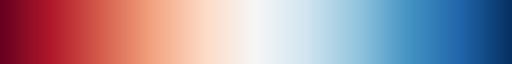

In [146]:
matplotlib.cm.get_cmap('RdBu') #bad - neutral, under: negative, over- positive

#### Positive Impact - without the word, prediction probability goes up
#### Negative Impact - without the word, prediction probability goes down

In [174]:
def word_imp_plot(text,scpi,scni,dcpi,dcni,pred_tar,Save=False):
    print("Predicted Target", ["Real","Fake"][pred_tar])
    s = colorize(text,scpi,scni)
    display(HTML(s))
    if Save:
        fn = "../HTML_report/colorize_" + str(np.random.randint(1,10)) + ".html"
        with open(fn, 'w') as f:
            f.write(s)
    #print(len(scpi.keys()))
    if(len(dcpi) !=0):
        print("Class prediction Shift")
        s = colorize(text,dcpi,dcni)
        display(HTML(s))

for i,text in enumerate(X_test):
    #text = " ".join(text.split())
    scpi,scni,dcpi,dcni,pred_tar = word_importance(text_clf,text)
    word_imp_plot(text,scpi,scni,dcpi,dcni,pred_tar,True)
    if i == 0: break

Predicted Target Fake


### Save test importance

In [105]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)

test_result = []
for i,text in enumerate(X_test):
    scpi,scni,dcpi,dcni,pred_tar = word_importance(text_clf,text)
    test_result.append([scpi,scni,dcpi,dcni,pred_tar])

import json
with open('test_result.json', 'w') as fout:
    json.dump(test_result, fout,cls=NpEncoder)

### Negative Impact sentences towards the prediction, makes fake more fake and real more real
### Positive Impact sentences aways from the prediction

In [127]:
power_word_fake = {} #makes more fake
power_word_defake = {} #pulls fake news towards defake
power_word_real = {} #makes more real
power_word_dereal = {} #makes more dereal
for i,text in enumerate(X_test):
    scpi,scni,dcpi,dcni,pred_tar = word_importance(text_clf,text)
    if(pred_tar == 1):#if predicted fake
        for word in scni:
            if(scni[word] != 0):
                if word not in power_word_fake.keys():
                    power_word_fake[word] = scni[word]
                else:
                    power_word_fake[word] = (power_word_fake[word] + scni[word])/2
        for word in scpi:
            if(scpi[word] != 0):
                if word not in power_word_defake.keys():
                    power_word_defake[word] = scpi[word]
                else:
                    power_word_defake[word] = (power_word_defake[word] + scpi[word])/2
    else: #real
        for word in scni:
            if(scni[word] != 0):
                if word not in power_word_real.keys():
                    power_word_real[word] = scni[word]
                else:
                    power_word_real[word] = (power_word_real[word] + scni[word])/2
        for word in scpi:
            if(scpi[word] != 0):
                if word not in power_word_dereal.keys():
                    power_word_dereal[word] = scpi[word]
                else:
                    power_word_dereal[word] = (power_word_dereal[word] + scpi[word])/2
    #if i == 500: break

### Powerful words, impacts the fake predection

Text(0.5, 1.0, 'Words worsening fake detection')

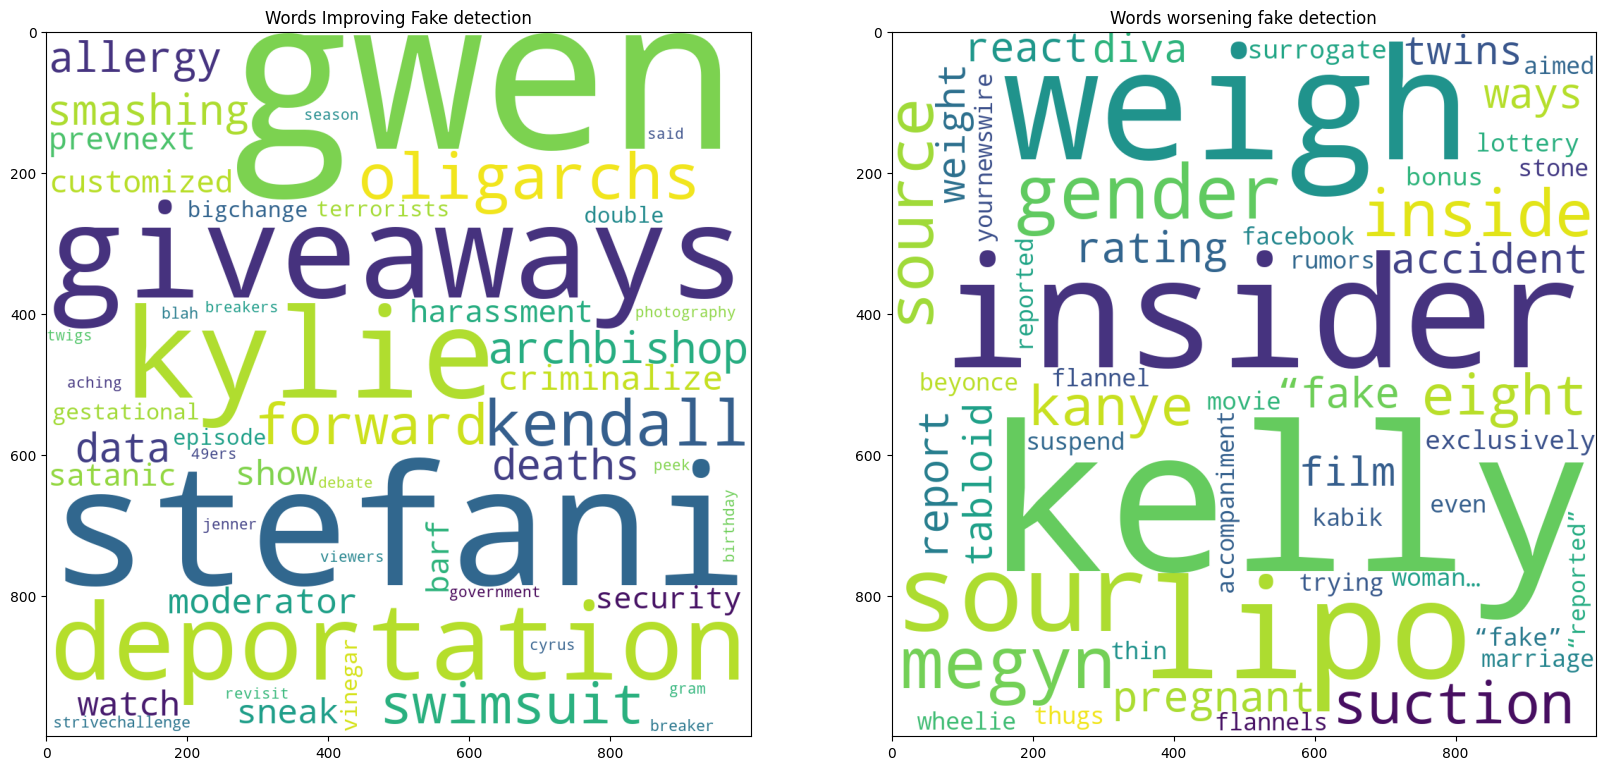

In [128]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc_fake = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=True).generate_from_frequencies(power_word_fake)
wc_defake = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=True).generate_from_frequencies(power_word_defake)
f,ax = plt.subplots(1,2,figsize=(20, 20))
ax[0].imshow(wc_fake)
ax[0].set_title("Words Improving Fake detection")
ax[1].imshow(wc_defake)
ax[1].set_title("Words worsening fake detection")

### Powerful words, impacting real predictions

Text(0.5, 1.0, 'Words worsening Real detection')

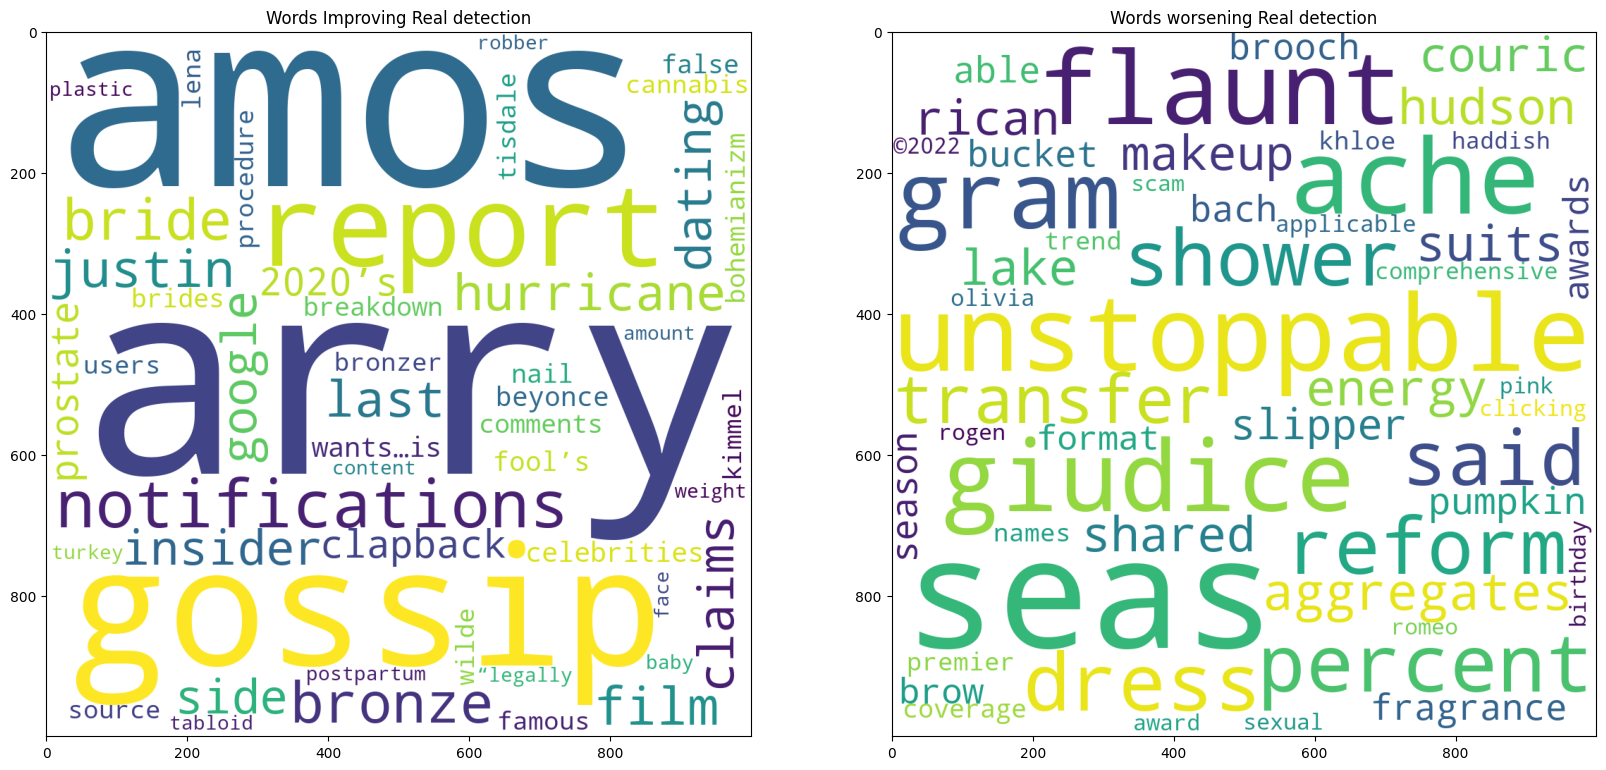

In [129]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc_real = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=True).generate_from_frequencies(power_word_real)
wc_dereal = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=True).generate_from_frequencies(power_word_dereal)
f,ax = plt.subplots(1,2,figsize=(20, 20))
ax[0].imshow(wc_real)
ax[0].set_title("Words Improving Real detection")
ax[1].imshow(wc_dereal)
ax[1].set_title("Words worsening Real detection")

### BERT

In [138]:
import json

fl = open("word_imp_BERT.json")

bert_word_imp = json.load(fl)

# a,b,c,d,e,f = bert_word_imp[0]

In [194]:
scpi,scni,dcpi,dcni,pred_tar,text = bert_word_imp[22]
word_imp_plot(text,scpi,scni,dcpi,dcni,pred_tar,True)

Predicted Target Fake


In [148]:
power_word_fake = {} #makes more fake
power_word_defake = {} #pulls fake news towards defake
power_word_real = {} #makes more real
power_word_dereal = {} #makes more dereal
for i,text in enumerate(bert_word_imp):
    scpi,scni,dcpi,dcni,pred_tar,_ = text
    if(pred_tar == 1):#if predicted fake
        for word in scni:
            if(scni[word] != 0):
                if word not in power_word_fake.keys():
                    power_word_fake[word] = scni[word]
                else:
                    power_word_fake[word] = (power_word_fake[word] + scni[word])/2
        for word in scpi:
            if(scpi[word] != 0):
                if word not in power_word_defake.keys():
                    power_word_defake[word] = scpi[word]
                else:
                    power_word_defake[word] = (power_word_defake[word] + scpi[word])/2
    else: #real
        for word in scni:
            if(scni[word] != 0):
                if word not in power_word_real.keys():
                    power_word_real[word] = scni[word]
                else:
                    power_word_real[word] = (power_word_real[word] + scni[word])/2
        for word in scpi:
            if(scpi[word] != 0):
                if word not in power_word_dereal.keys():
                    power_word_dereal[word] = scpi[word]
                else:
                    power_word_dereal[word] = (power_word_dereal[word] + scpi[word])/2

Text(0.5, 1.0, 'Words worsening fake detection')

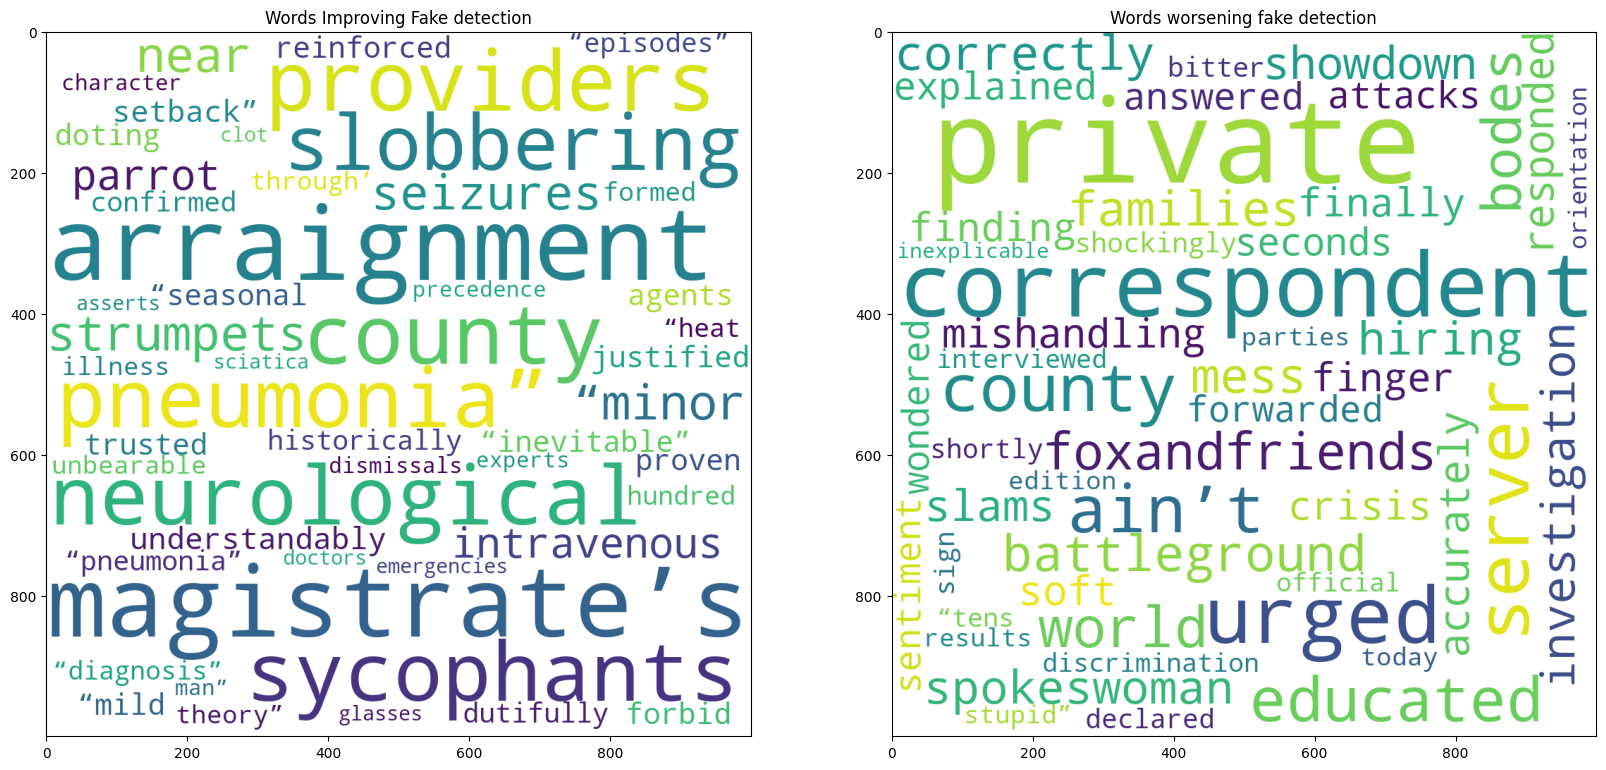

In [149]:
# On fake
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc_fake = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=True).generate_from_frequencies(power_word_fake)
wc_defake = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=True).generate_from_frequencies(power_word_defake)
f,ax = plt.subplots(1,2,figsize=(20, 20))
ax[0].imshow(wc_fake)
ax[0].set_title("Words Improving Fake detection")
ax[1].imshow(wc_defake)
ax[1].set_title("Words worsening fake detection")

Text(0.5, 1.0, 'Words worsening Real detection')

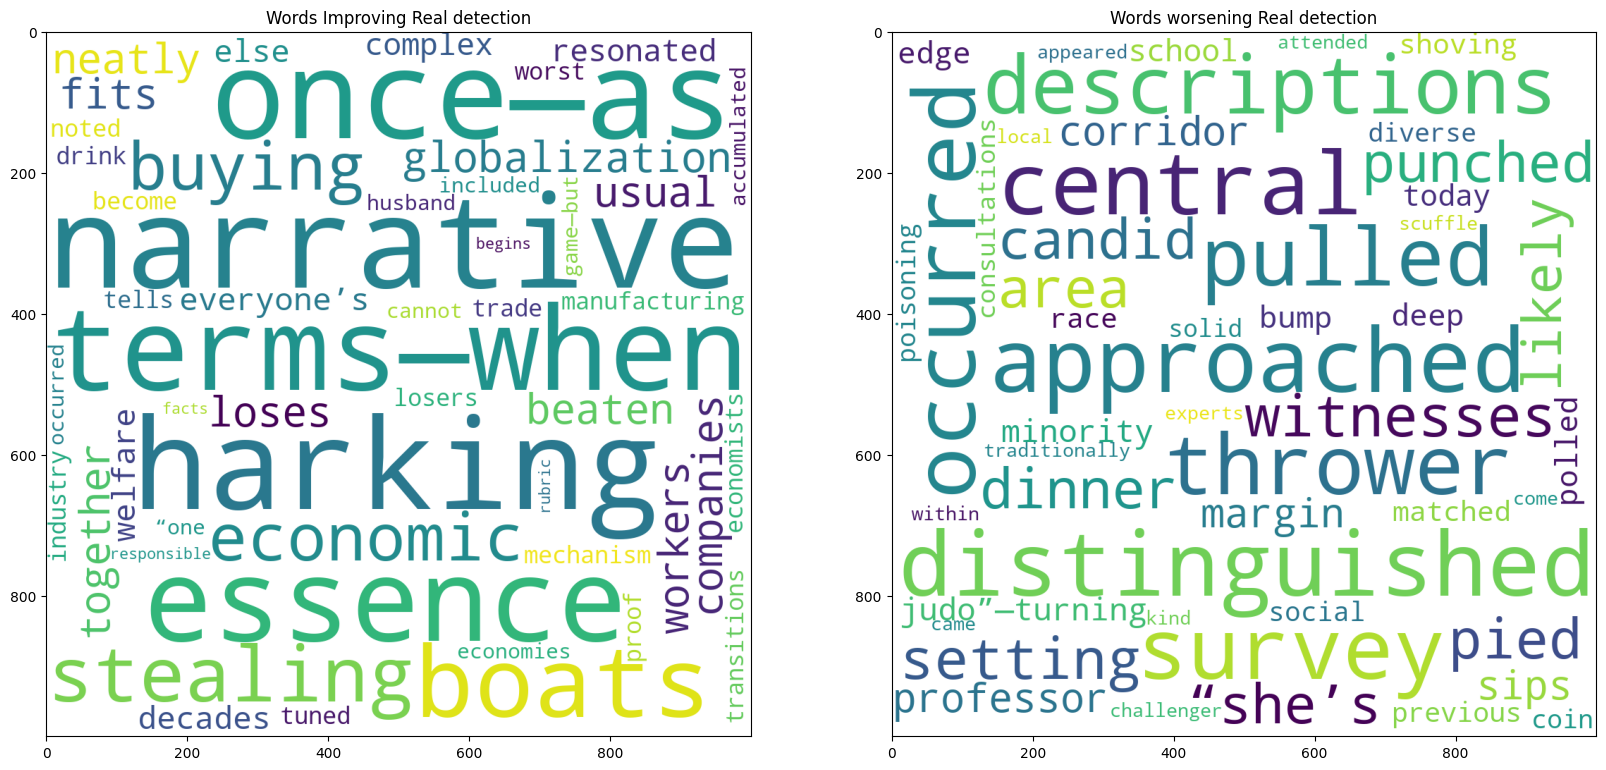

In [150]:
## ON real

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc_real = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=True).generate_from_frequencies(power_word_real)
wc_dereal = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=True).generate_from_frequencies(power_word_dereal)
f,ax = plt.subplots(1,2,figsize=(20, 20))
ax[0].imshow(wc_real)
ax[0].set_title("Words Improving Real detection")
ax[1].imshow(wc_dereal)
ax[1].set_title("Words worsening Real detection")